In this notebook, I calculate all offset of EOP products from VLBI solutions with respect to IERS 14 C04 series.

The solutions are listed below.

*NB: This list would be updated frequently.*

| Label | A priori position | Defining source ensemble |  Position of defining sources | NNR constraint strength (rad) |
|---|---|---|---|---|
| opa-icrf250 | ICRF3 S/X | GCRF250 | Adjusted | $10^{-10}$ |

In [1]:
from astropy.table import Table, Column
from astropy.time import Time
import astropy.units as u
from astropy.units import cds
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

# My modules
from my_progs.vlbi.read_eop import read_eob
from my_progs.vlbi.check_eob_wrt_c04 import calc_c04_offset

# Solution opa-icrf250

In [2]:
# opa-icrf250
icrf250_eob = read_eob("../data/icrf250/icrf250.eob")

eoboft = calc_c04_offset(icrf250_eob,
                         aprfile="../data/icrf250/icrf250_c04_apr.dat",
                         oftfile="../data/icrf250/icrf250_c04_oft.dat")

# Create a Time object for epochs of EOP，
# which is convenient to convert unit from mjd to jyear
pmrEpoch = Time(eoboft["epoch_pmr"], format="mjd")
nutEpoch = Time(eoboft["epoch_nut"], format="mjd")

# Output file: ../data/icrf250/icrf250_c04_apr.dat
# Output file: ../data/icrf250/icrf250_c04_oft.dat


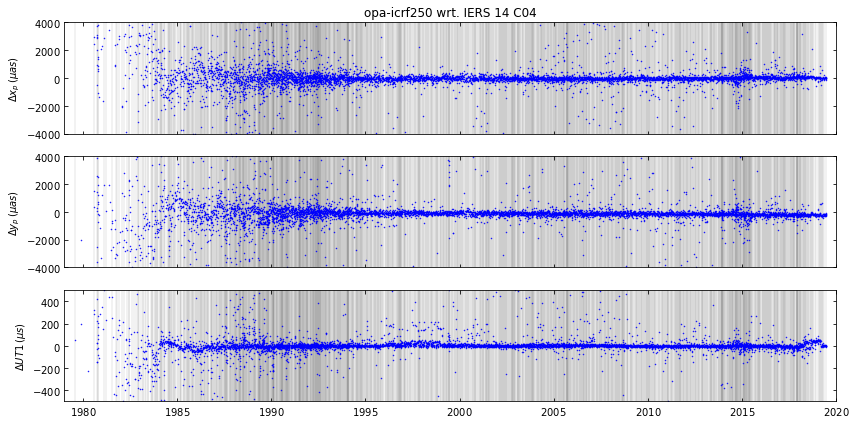

In [3]:
# EOP difference
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(12, 6), sharex=True, nrows=3)

# Error bar plot
ax0.errorbar(pmrEpoch.jyear, eoboft["dxp_c04"], yerr=eoboft["xp_err"]*1e3,
             fmt="b.", ms=1, elinewidth=0.1, ecolor="k", errorevery=5)
ax1.errorbar(pmrEpoch.jyear, eoboft["dyp_c04"], yerr=eoboft["yp_err"]*1e3,
             fmt="b.", ms=1, elinewidth=0.1, ecolor="k", errorevery=5)
ax2.errorbar(pmrEpoch.jyear, eoboft["dut_c04"], yerr=eoboft["dut1_err"]*1e3,
             fmt="b.", ms=1, elinewidth=0.1, ecolor="k", errorevery=5)

# Limits
ax0.axis([1979, 2020, -4000, 4000])
ax1.set_ylim([-4000, 4000])
ax2.set_ylim([-500, 500])

# Titles and Labels
ax0.set_title("opa-icrf250 wrt. IERS 14 C04")
ax0.set_ylabel("$\Delta x_p\,(\mu as)$")
ax1.set_ylabel("$\Delta y_p\,(\mu as)$")
ax2.set_ylabel("$\Delta UT1\,(\mu s)$")

# Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

plt.subplots_adjust(hspace=0.05)
plt.tight_layout()

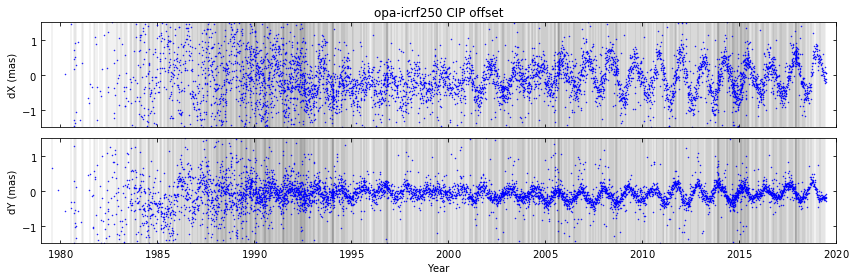

In [4]:
# EOP difference
fig, (ax0, ax1) = plt.subplots(figsize=(12, 4), sharex=True, nrows=2)

# Error bar plot
ax0.errorbar(nutEpoch.jyear, eoboft["dX"], yerr=eoboft["dX_err"],
             fmt="b.", ms=1, elinewidth=0.1, ecolor="k", errorevery=5)
ax1.errorbar(nutEpoch.jyear, eoboft["dY"], yerr=eoboft["dY_err"],
             fmt="b.", ms=1, elinewidth=0.1, ecolor="k", errorevery=5)

# Limits
ax0.axis([1979, 2020, -1.5, 1.5])
ax1.set_ylim([-1.5, 1.5])

# Titles and Labels
ax0.set_title("opa-icrf250 CIP offset")
ax0.set_ylabel("dX (mas)")
ax1.set_ylabel("dY (mas)")
ax1.set_xlabel("Year")

# Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

plt.subplots_adjust(hspace=0.15)
plt.tight_layout()

In [5]:
eoboft["dX_err"], eoboft["dY_err"]

(<Column name='dX_err' dtype='float64' unit='uas' length=6633>
 264.00000000000006
 263.00000000000006
              104.0
 338.00000000000006
 238.00000000000003
 249.00000000000003
 232.00000000000003
             1001.0
 238.00000000000003
             1172.0
              709.0
 403.00000000000006
                ...
 1988.0000000000002
 194.00000000000003
 194.00000000000003
              180.0
 228.00000000000003
 197.00000000000003
 216.00000000000003
 187.00000000000003
 182.00000000000003
 320.00000000000006
 186.00000000000003
 3849.0000000000005,
 <Column name='dY_err' dtype='float64' unit='uas' length=6633>
 108.00000000000001
  93.00000000000001
               38.0
 108.00000000000001
 129.00000000000003
  83.00000000000001
              102.0
 261.00000000000006
               90.0
              592.0
 203.00000000000003
 132.00000000000003
                ...
 439.00000000000006
  81.00000000000001
  77.00000000000001
  85.00000000000001
               73.0
             

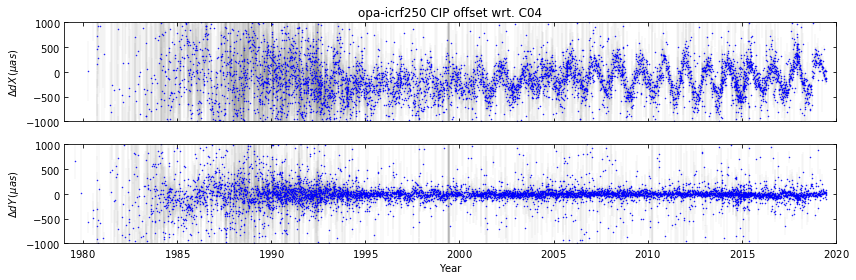

In [6]:
# EOP difference
fig, (ax0, ax1) = plt.subplots(figsize=(12, 4), sharex=True, nrows=2)

# Error bar plot
ax0.errorbar(nutEpoch.jyear, eoboft["ddX_c04"], yerr=eoboft["dX_err"],
             fmt="b.", ms=1, elinewidth=0.05, ecolor="k")
ax1.errorbar(nutEpoch.jyear, eoboft["ddY_c04"], yerr=eoboft["dY_err"],
             fmt="b.", ms=1, elinewidth=0.05, ecolor="k")

# Limits
ax0.axis([1979, 2020, -1000, 1000])
ax1.set_ylim([-1000, 1000])

# Titles and Labels
ax0.set_title("opa-icrf250 CIP offset wrt. C04")
ax0.set_ylabel("$\Delta dX\,(\mu as)$")
ax1.set_ylabel("$\Delta dY\,(\mu as)$")
ax1.set_xlabel("Year")

# Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

plt.subplots_adjust(hspace=0.15)
plt.tight_layout()

# Solution opa-icrf250-fix

In [7]:
# opa-icrf250
icrf250_fix_eob = read_eob("../data/icrf250-fix/icrf250-fix.eob")

eoboft = calc_c04_offset(icrf250_fix_eob,
                         aprfile="../data/icrf250-fix/icrf250-fix_c04_apr.dat",
                         oftfile="../data/icrf250-fix/icrf250-fix_c04_oft.dat")

# Create a Time object for epochs of EOP，
# which is convenient to convert unit from mjd to jyear
pmrEpoch = Time(eoboft["epoch_pmr"], format="mjd")
nutEpoch = Time(eoboft["epoch_nut"], format="mjd")

# Output file: ../data/icrf250-fix/icrf250-fix_c04_apr.dat
# Output file: ../data/icrf250-fix/icrf250-fix_c04_oft.dat


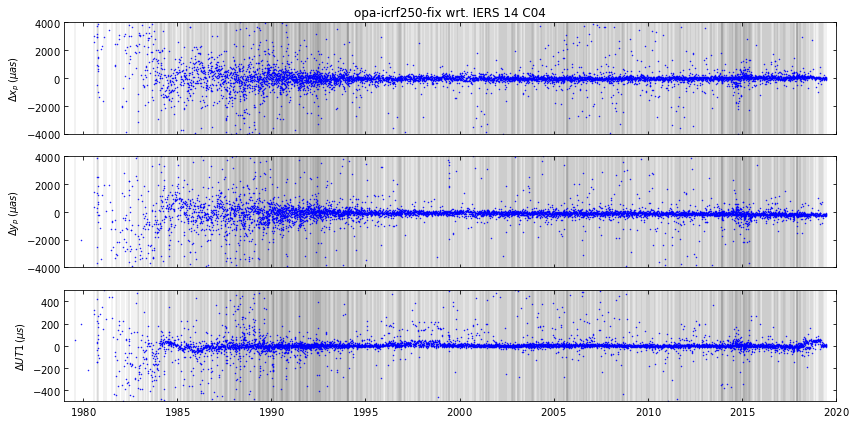

In [8]:
# EOP difference
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(12, 6), sharex=True, nrows=3)

# Error bar plot
ax0.errorbar(pmrEpoch.jyear, eoboft["dxp_c04"], yerr=eoboft["xp_err"]*1e3,
             fmt="b.", ms=1, elinewidth=0.1, ecolor="k", errorevery=5)
ax1.errorbar(pmrEpoch.jyear, eoboft["dyp_c04"], yerr=eoboft["yp_err"]*1e3,
             fmt="b.", ms=1, elinewidth=0.1, ecolor="k", errorevery=5)
ax2.errorbar(pmrEpoch.jyear, eoboft["dut_c04"], yerr=eoboft["dut1_err"]*1e3,
             fmt="b.", ms=1, elinewidth=0.1, ecolor="k", errorevery=5)

# Limits
ax0.axis([1979, 2020, -4000, 4000])
ax1.set_ylim([-4000, 4000])
ax2.set_ylim([-500, 500])

# Titles and Labels
ax0.set_title("opa-icrf250-fix wrt. IERS 14 C04")
ax0.set_ylabel("$\Delta x_p\,(\mu as)$")
ax1.set_ylabel("$\Delta y_p\,(\mu as)$")
ax2.set_ylabel("$\Delta UT1\,(\mu s)$")

# Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

plt.subplots_adjust(hspace=0.05)
plt.tight_layout()

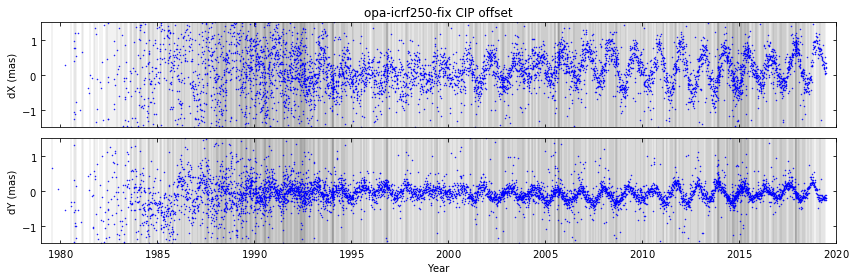

In [9]:
fig, (ax0, ax1) = plt.subplots(figsize=(12, 4), sharex=True, nrows=2)

# Error bar plot
ax0.errorbar(nutEpoch.jyear, eoboft["dX"], yerr=eoboft["dX_err"],
             fmt="b.", ms=1, elinewidth=0.1, ecolor="k", errorevery=5)
ax1.errorbar(nutEpoch.jyear, eoboft["dY"], yerr=eoboft["dY_err"],
             fmt="b.", ms=1, elinewidth=0.1, ecolor="k", errorevery=5)

# Limits
ax0.axis([1979, 2020, -1.5, 1.5])
ax1.set_ylim([-1.5, 1.5])

# Titles and Labels
ax0.set_title("opa-icrf250-fix CIP offset")
ax0.set_ylabel("dX (mas)")
ax1.set_ylabel("dY (mas)")
ax1.set_xlabel("Year")

# Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

plt.subplots_adjust(hspace=0.15)
plt.tight_layout()

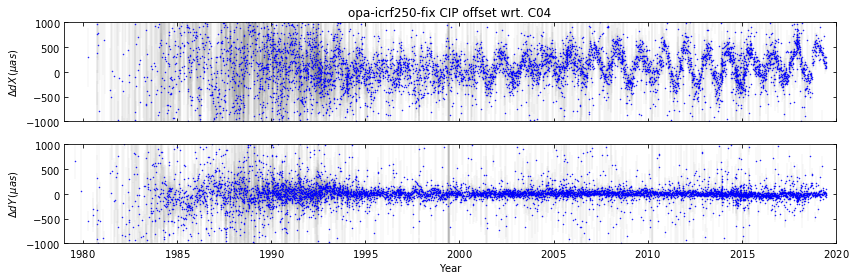

In [10]:
fig, (ax0, ax1) = plt.subplots(figsize=(12, 4), sharex=True, nrows=2)

# Error bar plot
ax0.errorbar(nutEpoch.jyear, eoboft["ddX_c04"], yerr=eoboft["dX_err"],
             fmt="b.", ms=1, elinewidth=0.05, ecolor="k")
ax1.errorbar(nutEpoch.jyear, eoboft["ddY_c04"], yerr=eoboft["dY_err"],
             fmt="b.", ms=1, elinewidth=0.05, ecolor="k")

# Limits
ax0.axis([1979, 2020, -1000, 1000])
ax1.set_ylim([-1000, 1000])

# Titles and Labels
ax0.set_title("opa-icrf250-fix CIP offset wrt. C04")
ax0.set_ylabel("$\Delta dX\,(\mu as)$")
ax1.set_ylabel("$\Delta dY\,(\mu as)$")
ax1.set_xlabel("Year")

# Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

plt.subplots_adjust(hspace=0.15)
plt.tight_layout()

# Solution opa-gcrf250

In [11]:
# opa-icrf250
gcrf250_eob = read_eob("../data/gcrf-a1u/gcrf-a1u.eob")

eoboft = calc_c04_offset(gcrf250_eob,
                         aprfile="../data/gcrf-a1u/gcrf-a1u_c04_apr.dat",
                         oftfile="../data/gcrf-a1u/gcrf-a1u_c04_oft.dat")

# Create a Time object for epochs of EOP，
# which is convenient to convert unit from mjd to jyear
pmrEpoch = Time(eoboft["epoch_pmr"], format="mjd")
nutEpoch = Time(eoboft["epoch_nut"], format="mjd")

# Output file: ../data/gcrf-a1u/gcrf-a1u_c04_apr.dat
# Output file: ../data/gcrf-a1u/gcrf-a1u_c04_oft.dat


In [12]:
eoboft["dX_err"], eoboft["dY_err"]

(<Column name='dX_err' dtype='float64' unit='uas' length=6633>
 264.00000000000006
 263.00000000000006
              104.0
 338.00000000000006
 238.00000000000003
 249.00000000000003
 232.00000000000003
             1001.0
 238.00000000000003
             1172.0
              709.0
 403.00000000000006
                ...
 1988.0000000000002
 194.00000000000003
 194.00000000000003
              180.0
 228.00000000000003
 197.00000000000003
 216.00000000000003
 187.00000000000003
 182.00000000000003
 320.00000000000006
 186.00000000000003
 3849.0000000000005,
 <Column name='dY_err' dtype='float64' unit='uas' length=6633>
 108.00000000000001
  93.00000000000001
               38.0
 108.00000000000001
 129.00000000000003
  83.00000000000001
              102.0
 261.00000000000006
               90.0
              592.0
 203.00000000000003
 132.00000000000003
                ...
 439.00000000000006
  81.00000000000001
  77.00000000000001
  85.00000000000001
               73.0
             

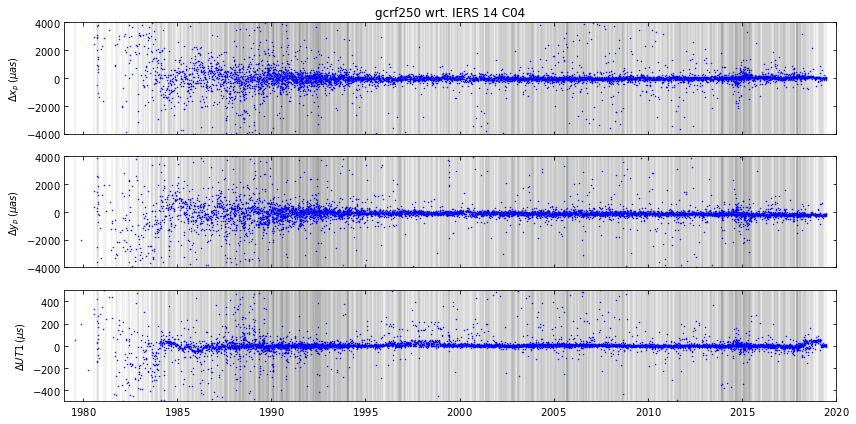

In [13]:
# EOP difference
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(12, 6), sharex=True, nrows=3)

# Error bar plot
ax0.errorbar(pmrEpoch.jyear, eoboft["dxp_c04"], yerr=eoboft["xp_err"]*1e3,
             fmt="b.", ms=1, elinewidth=0.1, ecolor="k", errorevery=5)
ax1.errorbar(pmrEpoch.jyear, eoboft["dyp_c04"], yerr=eoboft["yp_err"]*1e3,
             fmt="b.", ms=1, elinewidth=0.1, ecolor="k", errorevery=5)
ax2.errorbar(pmrEpoch.jyear, eoboft["dut_c04"], yerr=eoboft["dut1_err"]*1e3,
             fmt="b.", ms=1, elinewidth=0.1, ecolor="k", errorevery=5)

# Limits
ax0.axis([1979, 2020, -4000, 4000])
ax1.set_ylim([-4000, 4000])
ax2.set_ylim([-500, 500])

# Titles and Labels
ax0.set_title("gcrf250 wrt. IERS 14 C04")
ax0.set_ylabel("$\Delta x_p\,(\mu as)$")
ax1.set_ylabel("$\Delta y_p\,(\mu as)$")
ax2.set_ylabel("$\Delta UT1\,(\mu s)$")

# Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

plt.subplots_adjust(hspace=0.05)
plt.tight_layout()

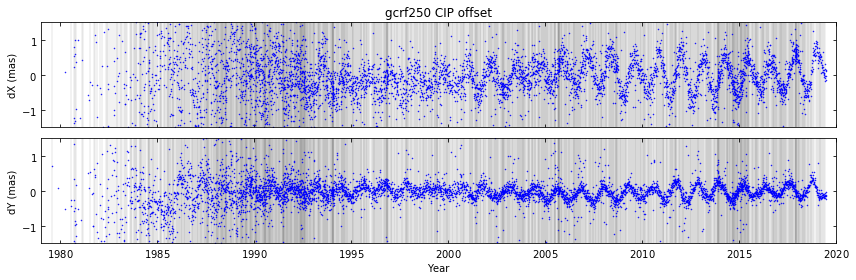

In [14]:
# EOP difference
fig, (ax0, ax1) = plt.subplots(figsize=(12, 4), sharex=True, nrows=2)

# Error bar plot
ax0.errorbar(nutEpoch.jyear, eoboft["dX"], yerr=eoboft["dX_err"],
             fmt="b.", ms=1, elinewidth=0.1, ecolor="k", errorevery=5)
ax1.errorbar(nutEpoch.jyear, eoboft["dY"], yerr=eoboft["dY_err"],
             fmt="b.", ms=1, elinewidth=0.1, ecolor="k", errorevery=5)

# Limits
ax0.axis([1979, 2020, -1.5, 1.5])
ax1.set_ylim([-1.5, 1.5])

# Titles and Labels
ax0.set_title("gcrf250 CIP offset")
ax0.set_ylabel("dX (mas)")
ax1.set_ylabel("dY (mas)")
ax1.set_xlabel("Year")

# Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

plt.subplots_adjust(hspace=0.15)
plt.tight_layout()

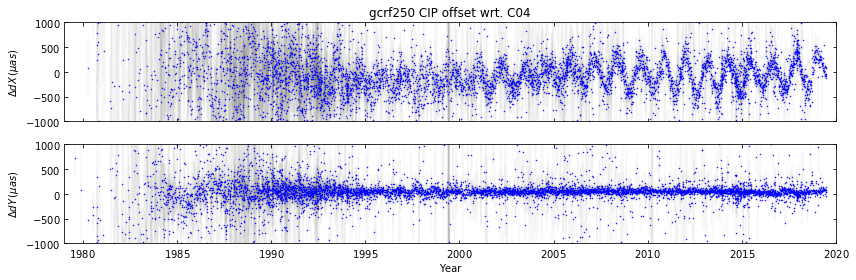

In [15]:
# EOP difference
fig, (ax0, ax1) = plt.subplots(figsize=(12, 4), sharex=True, nrows=2)

# Error bar plot
ax0.errorbar(nutEpoch.jyear, eoboft["ddX_c04"], yerr=eoboft["dX_err"],
             fmt="b.", ms=1, elinewidth=0.05, ecolor="k")
ax1.errorbar(nutEpoch.jyear, eoboft["ddY_c04"], yerr=eoboft["dY_err"],
             fmt="b.", ms=1, elinewidth=0.05, ecolor="k")

# Limits
ax0.axis([1979, 2020, -1000, 1000])
ax1.set_ylim([-1000, 1000])

# Titles and Labels
ax0.set_title("gcrf250 CIP offset wrt. C04")
ax0.set_ylabel("$\Delta dX\,(\mu as)$")
ax1.set_ylabel("$\Delta dY\,(\mu as)$")
ax1.set_xlabel("Year")

# Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

plt.subplots_adjust(hspace=0.15)
plt.tight_layout()

# Solution gcrf-a2u

It is the same as the `gcrf-a1u` and thus not shown here.

# Solution gcrf-a1u-fix

In [16]:
# gcrf250-fix
gcrf250_fix_eob = read_eob("../data/gcrf-a1u-fix/gcrf-a1u-fix.eob")

eoboft = calc_c04_offset(gcrf250_fix_eob,
                         aprfile="../data/gcrf-a1u-fix/gcrf-a1u-fix_c04_apr.dat",
                         oftfile="../data/gcrf-a1u-fix/gcrf-a1u-fix_c04_oft.dat")

# Create a Time object for epochs of EOP，
# which is convenient to convert unit from mjd to jyear
pmrEpoch = Time(eoboft["epoch_pmr"], format="mjd")
nutEpoch = Time(eoboft["epoch_nut"], format="mjd")

# Output file: ../data/gcrf-a1u-fix/gcrf-a1u-fix_c04_apr.dat
# Output file: ../data/gcrf-a1u-fix/gcrf-a1u-fix_c04_oft.dat


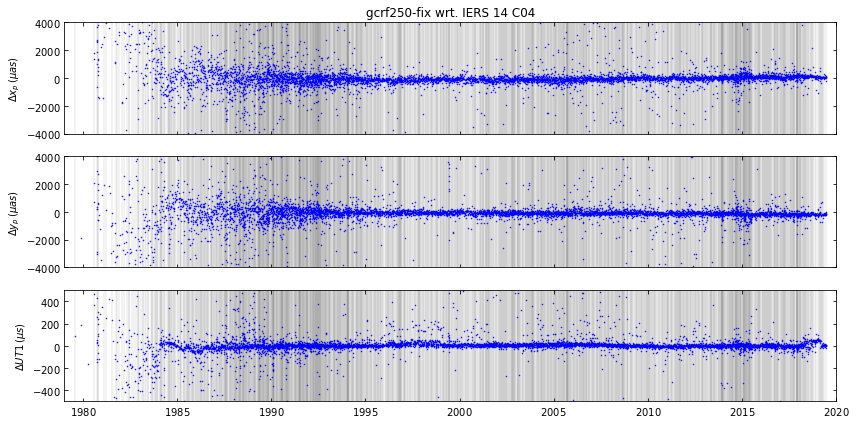

In [17]:
# EOP difference
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(12, 6), sharex=True, nrows=3)

# Error bar plot
ax0.errorbar(pmrEpoch.jyear, eoboft["dxp_c04"], yerr=eoboft["xp_err"]*1e3,
             fmt="b.", ms=1, elinewidth=0.1, ecolor="k", errorevery=5)
ax1.errorbar(pmrEpoch.jyear, eoboft["dyp_c04"], yerr=eoboft["yp_err"]*1e3,
             fmt="b.", ms=1, elinewidth=0.1, ecolor="k", errorevery=5)
ax2.errorbar(pmrEpoch.jyear, eoboft["dut_c04"], yerr=eoboft["dut1_err"]*1e3,
             fmt="b.", ms=1, elinewidth=0.1, ecolor="k", errorevery=5)

# Limits
ax0.axis([1979, 2020, -4000, 4000])
ax1.set_ylim([-4000, 4000])
ax2.set_ylim([-500, 500])

# Titles and Labels
ax0.set_title("gcrf250-fix wrt. IERS 14 C04")
ax0.set_ylabel("$\Delta x_p\,(\mu as)$")
ax1.set_ylabel("$\Delta y_p\,(\mu as)$")
ax2.set_ylabel("$\Delta UT1\,(\mu s)$")

# Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

plt.subplots_adjust(hspace=0.05)
plt.tight_layout()

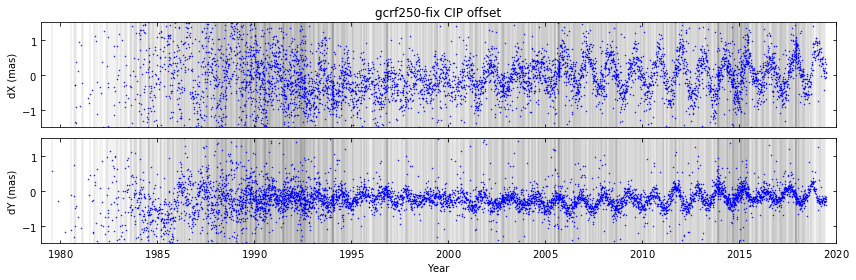

In [18]:
# EOP difference
fig, (ax0, ax1) = plt.subplots(figsize=(12, 4), sharex=True, nrows=2)

# Error bar plot
ax0.errorbar(nutEpoch.jyear, eoboft["dX"], yerr=eoboft["dX_err"],
             fmt="b.", ms=1, elinewidth=0.1, ecolor="k", errorevery=5)
ax1.errorbar(nutEpoch.jyear, eoboft["dY"], yerr=eoboft["dY_err"],
             fmt="b.", ms=1, elinewidth=0.1, ecolor="k", errorevery=5)

# Limits
ax0.axis([1979, 2020, -1.5, 1.5])
ax1.set_ylim([-1.5, 1.5])

# Titles and Labels
ax0.set_title("gcrf250-fix CIP offset")
ax0.set_ylabel("dX (mas)")
ax1.set_ylabel("dY (mas)")
ax1.set_xlabel("Year")

# Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

plt.subplots_adjust(hspace=0.15)
plt.tight_layout()

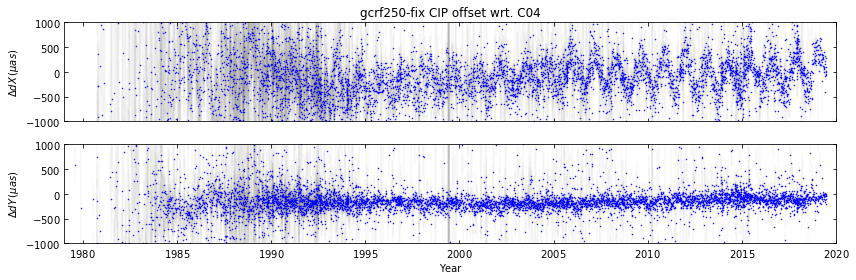

In [19]:
# EOP difference
fig, (ax0, ax1) = plt.subplots(figsize=(12, 4), sharex=True, nrows=2)

# Error bar plot
ax0.errorbar(nutEpoch.jyear, eoboft["ddX_c04"], yerr=eoboft["dX_err"],
             fmt="b.", ms=1, elinewidth=0.05, ecolor="k")
ax1.errorbar(nutEpoch.jyear, eoboft["ddY_c04"], yerr=eoboft["dY_err"],
             fmt="b.", ms=1, elinewidth=0.05, ecolor="k")

# Limits
ax0.axis([1979, 2020, -1000, 1000])
ax1.set_ylim([-1000, 1000])

# Titles and Labels
ax0.set_title("gcrf250-fix CIP offset wrt. C04")
ax0.set_ylabel("$\Delta dX\,(\mu as)$")
ax1.set_ylabel("$\Delta dY\,(\mu as)$")
ax1.set_xlabel("Year")

# Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

plt.subplots_adjust(hspace=0.15)
plt.tight_layout()

# Solution gcrf-a2u-fix

In [20]:
# gcrf250-fix-lsn
gcrf250_fix_nnr200_eob = read_eob("../data/gcrf-a2u-fix/gcrf-a2u-fix.eob")

eoboft = calc_c04_offset(icrf250_fix_nnr200_eob,
                         aprfile="../data/gcrf-a2u-fix/gcrf-a2u-fix_c04_apr.dat",
                         oftfile="../data/gcrf-a2u-fix/gcrf-a2u-fix_c04_oft.dat")

# Create a Time object for epochs of EOP，
# which is convenient to convert unit from mjd to jyear
pmrEpoch = Time(eoboft["epoch_pmr"], format="mjd")
nutEpoch = Time(eoboft["epoch_nut"], format="mjd")

NameError: name 'icrf250_fix_nnr200_eob' is not defined

In [ ]:
# EOP difference
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(12, 6), sharex=True, nrows=3)

# Error bar plot
ax0.errorbar(pmrEpoch.jyear, eoboft["dxp_c04"], yerr=eoboft["xp_err"]*1e3,
             fmt="b.", ms=1, elinewidth=0.1, ecolor="k", errorevery=5)
ax1.errorbar(pmrEpoch.jyear, eoboft["dyp_c04"], yerr=eoboft["yp_err"]*1e3,
             fmt="b.", ms=1, elinewidth=0.1, ecolor="k", errorevery=5)
ax2.errorbar(pmrEpoch.jyear, eoboft["dut_c04"], yerr=eoboft["dut1_err"]*1e3,
             fmt="b.", ms=1, elinewidth=0.1, ecolor="k", errorevery=5)

# Limits
ax0.axis([1979, 2020, -4000, 4000])
ax1.set_ylim([-4000, 4000])
ax2.set_ylim([-500, 500])

# Titles and Labels
ax0.set_title("gcrf250-fix wrt. IERS 14 C04")
ax0.set_ylabel("$\Delta x_p\,(\mu as)$")
ax1.set_ylabel("$\Delta y_p\,(\mu as)$")
ax2.set_ylabel("$\Delta UT1\,(\mu s)$")

# Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")

plt.subplots_adjust(hspace=0.05)
plt.tight_layout()

In [ ]:
# EOP difference
fig, (ax0, ax1) = plt.subplots(figsize=(12, 4), sharex=True, nrows=2)

# Error bar plot
ax0.errorbar(nutEpoch.jyear, eoboft["dX"], yerr=eoboft["dX_err"],
             fmt="b.", ms=1, elinewidth=0.1, ecolor="k", errorevery=5)
ax1.errorbar(nutEpoch.jyear, eoboft["dY"], yerr=eoboft["dY_err"],
             fmt="b.", ms=1, elinewidth=0.1, ecolor="k", errorevery=5)

# Limits
ax0.axis([1979, 2020, -1.5, 1.5])
ax1.set_ylim([-1.5, 1.5])

# Titles and Labels
ax0.set_title("gcrf250-fix CIP offset")
ax0.set_ylabel("dX (mas)")
ax1.set_ylabel("dY (mas)")
ax1.set_xlabel("Year")

# Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

plt.subplots_adjust(hspace=0.15)
plt.tight_layout()

In [ ]:
# EOP difference
fig, (ax0, ax1) = plt.subplots(figsize=(12, 4), sharex=True, nrows=2)

# Error bar plot
ax0.errorbar(nutEpoch.jyear, eoboft["ddX_c04"], yerr=eoboft["dX_err"],
             fmt="b.", ms=1, elinewidth=0.05, ecolor="k")
ax1.errorbar(nutEpoch.jyear, eoboft["ddY_c04"], yerr=eoboft["dY_err"],
             fmt="b.", ms=1, elinewidth=0.05, ecolor="k")

# Limits
ax0.axis([1979, 2020, -1000, 1000])
ax1.set_ylim([-1000, 1000])

# Titles and Labels
ax0.set_title("gcrf250-fix CIP offset wrt. C04")
ax0.set_ylabel("$\Delta dX\,(\mu as)$")
ax1.set_ylabel("$\Delta dY\,(\mu as)$")
ax1.set_xlabel("Year")

# Ticks
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

plt.subplots_adjust(hspace=0.15)
plt.tight_layout()